# Image Classification

In this notebook, we will walk through an image classification example using the Fashion MNIST dataset.

### Fashion MNIST Dataset Overview

The **Fashion MNIST** dataset is a collection of grayscale images which contains 60,000 training images and 10,000 test images of 10 different fashion categories. Each image is 28x28 pixels in size, and each label represents one of the following clothing items:

1. **T-shirt/top**
2. **Trouser**
3. **Pullover**
4. **Dress**
5. **Coat**
6. **Sandal**
7. **Shirt**
8. **Sneaker**
9. **Bag**
10. **Ankle boot**

The goal of the Fashion MNIST dataset is to classify these images into one of the 10 categories (multi-class classification).

In [ ]:
# Necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

### Dataset Loading and Preprocessing

In [ ]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Define the labels (y)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

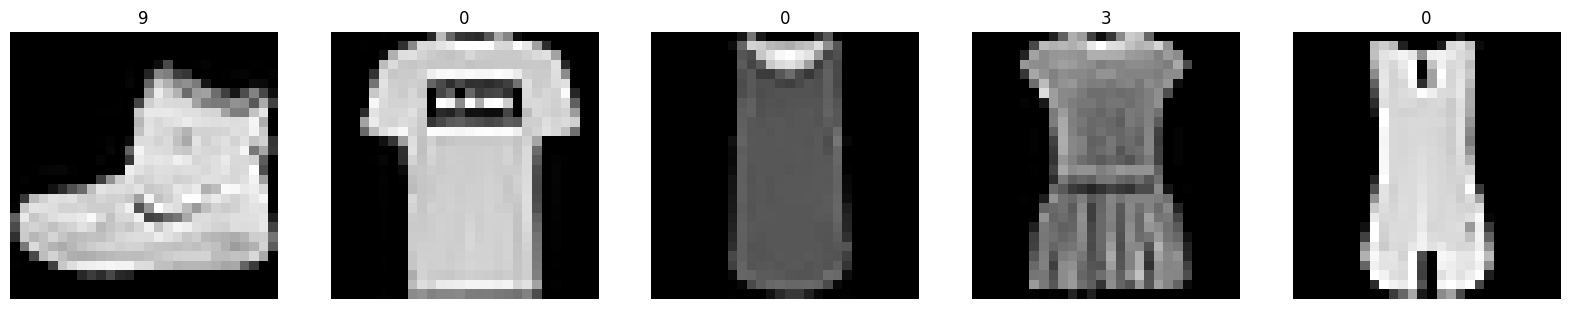

In [ ]:
# Plot the first 5 images from the training set to see what the images look like
plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(X_train[:5], y_train[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'{label}')
    plt.axis('off')

In [ ]:
# Print dataset shapes to understand the dimensions we're working with
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# (n_observations, n_features)

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


We need to reshape the training and testing data to fit the **random forest classifier**. Currently, each image is a 2D array with shape `(28,28)`,represinting the 28x28 grid of pixels. Each image will be flattened to a 1D vector with 784 elements.

In [ ]:
# Reshape the data
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Checking
X_train.shape

(60000, 784)

### Fitting the Random Forest Classifier

In [ ]:
# Initialise the model
clf = RandomForestClassifier(random_state=42)

Random forests, like most machine learning algorithms, have hyperparameters that we can adjust. The process of finding the best combination of these hyperparameters is called **hyperparameter tuning**. In this part, we'll use **grid-search cross-validation** to figure out the best set of hyperparameters for our classifier. We'll define a grid of hyperparameters, `param_grid`, and then let `GridSearchCV` try out all the different combinations. The set that gives the best cross-validation score will be the one we go with.


In [ ]:
# Define parameter grid
param_grid = {
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50],
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [None, 10, 20, 30, 40, 50]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid)

# Fit the grid search to the training data
grid_search.fit(X_train[:100], y_train[:100])

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_split': [2, 5, 10, 20, 30, 40, 50],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [ ]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best min_samples_split: {best_params['min_samples_split']} \nBest n_estimators: {best_params['n_estimators']} \nBest max_depth: {best_params['max_depth']}")
print(f"Best cross-validation score: {best_score:.2f}")

Best min_samples_split: 5 
Best n_estimators: 200 
Best max_depth: None
Best cross-validation score: 0.77


In [ ]:
# Use the best set of parameters to create the final model
clf = RandomForestClassifier(min_samples_split=5,
                             n_estimators=200,
                             max_depth=None,
                             random_state=42)
clf.fit(X_train[:100], y_train[:100])
y_pred = clf.predict(X_test)

## Model Evaluation

After fitting the model, we have to evaluate how well it learned from the training data. We will use the reserved test set for this and produce some performance metrics to analyse.

In [ ]:
# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[739,  11,  15,  70,   8,  15, 139,   1,   1,   1],
       [ 18, 854,  12, 103,   7,   2,   4,   0,   0,   0],
       [ 14,   1, 549,   7, 265,   7, 155,   0,   2,   0],
       [ 82,  10,   6, 796,  47,   9,  50,   0,   0,   0],
       [  9,   1, 212,  84, 526,   9, 158,   0,   1,   0],
       [  0,   0,   0,   3,   0, 764,   0, 155,   0,  78],
       [212,   4, 144,  49, 152,  13, 421,   1,   3,   1],
       [  0,   0,   0,   0,   0,  68,   0, 791,   0, 141],
       [ 20,   1,  51,  15, 108,  83,  49,  93, 441, 139],
       [  0,   0,   0,   1,   0,  31,   0,  33,   0, 935]])

'\ndisp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)\ndisp.plot(cmap=plt.cm.Blues)\nplt.show()\n'

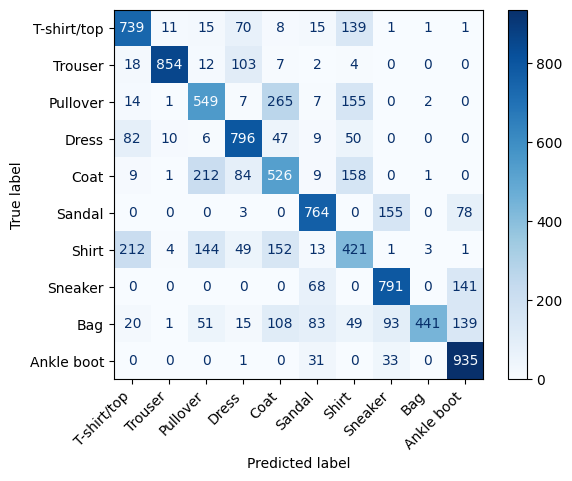

In [ ]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45, ha='right')

'''
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()
'''

In [ ]:
''' The average parameter: Why is macro necesssary?
    Macro = It is useful when you want to give equal importance to each class
    Micro = It is useful when you want to reflect the overall performance of
            the classifier without giving weight to individual classes.
    Weighted = It is useful when you want to give importance to the performance
               on larger classes.
'''

# Evaluate the final model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

print(f"Test set accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Test set accuracy: 0.68
Precision: 0.70
Recall: 0.68
